# Preprocessing notebook

Authors: Elisa Nguyen and Daphne Theodorakopoulos

## 1. Library imports

In [ ]:
import numpy as np  
import pandas as pd 
pd.set_option("display.max_colwidth", 200)          

from sklearn.model_selection import train_test_split
import re 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences 
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')

## 2. Split conclusions from findings

- read original dataset
- write to DataFrame 
- remove '\r', '\n'
- split conclusion from findings
- remove signatures of doctors

In [ ]:
df = pd.read_excel('path_to_data')

In [ ]:
df['verslag'] = df['verslag'].str.replace('\r',' ').str.replace('\n', ' ').str.replace('  ',' ')

In [ ]:
df['findings'] = df["verslag"].str.lower().str.rsplit("conclusie", 1, expand = True)[0]
df['conclusie'] = df["verslag"].str.lower().str.rsplit("conclusie", 1, expand = True)[1]

In [ ]:
df['conclusie'] = df['conclusie'].str.strip(':').str.strip(',').str.strip(' ').str.replace('xxx / xxx', '').str.replace('xxx/xxx','').str.replace('/ xxx','')

In [ ]:
df.drop_duplicates(subset=['findings'],inplace=True)  #dropping duplicates
df.dropna(axis=0,inplace=True)   #dropping na
df.head()

## 3. Clean findings and conclusion

- remove stopwords
- remove unwanted characters

In [ ]:
# modified version based on Tutorial from https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/
stop_words = set(stopwords.words('dutch')) 
def text_cleaner(text):
    newString = text.lower()
    newString = re.sub('"','', newString)  
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=1:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

def summary_cleaner(text):
    newString = re.sub('"','', text)  
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>=1:                                 
            newString=newString+i+' '  
    return newString

In [ ]:
df['cleaned_text'] = df['findings'].apply(text_cleaner)
df['cleaned_summary']=df['conclusie'].apply(summary_cleaner)
df['cleaned_summary'].replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)
df['cleaned_summary'] = df['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')
df[['cleaned_text','cleaned_summary']].head()

## 4. Get word counts for findings and conlcusion

- maximum to find maximum length of findings and conclusion
- median to see the dominant length, and to determine the dominant ratio between findings and conclusion

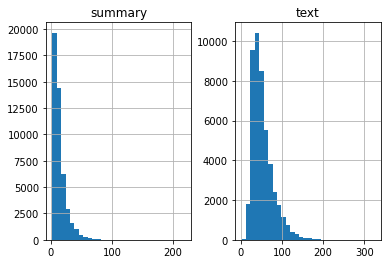

In [ ]:
text_word_count = df['cleaned_text'].apply(lambda i: len(i.split()))
summary_word_count = df['cleaned_summary'].apply(lambda i: len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [ ]:
np.max(text_word_count)

324

In [ ]:
np.median(text_word_count)

46.0

In [ ]:
np.max(summary_word_count)

219

In [ ]:
np.median(summary_word_count)

12.0

## 5. Save preprocessed data

- split to train, val, test
- save as excels

In [ ]:
x_train,x_v,y_train,y_v = train_test_split(df['cleaned_text'],df['cleaned_summary'],test_size=0.3,random_state=0,shuffle=True) 
x_val, x_test, y_val, y_test = train_test_split(x_v,y_v,test_size=0.33,random_state=0,shuffle=True) 

In [ ]:
x_train.to_excel('x_train.xlsx', index=False)
y_train.to_excel('y_train.xlsx', index=False)
x_test.to_excel('x_test.xlsx', index=False)
y_test.to_excel('y_test.xlsx', index=False)
x_val.to_excel('x_val.xlsx', index=False)
y_val.to_excel('y_val.xlsx', index=False)